In [1]:
from eodhd import APIClient
import pandas as pd

In [2]:
api_key = "5cb671b0b4a790.35526238"
api = APIClient(api_key)

In [27]:
Energy = api.stock_market_screener(filters=[['sector', 'match', 'Energy'],['exchange','=','US']],limit=100)
Energydf = pd.DataFrame(Energy)

NameError: name 'dividend_yield' is not defined

In [114]:
import requests
base_url = "https://eodhd.com/api/screener"
query_params = {
    'api_token': api_key,
    'sort': 'market_capitalization.desc',
    'filters': '[["exchange","=","US"],["sector","=","Energy"]]',
    'limit': '100',
    'offset': '0'
}
from urllib.parse import urlencode
encoded_params = urlencode(query_params)
final_url = f"{base_url}?{encoded_params}"
energydata = requests.get(final_url).json()
print(energydata)
Energydf = pd.DataFrame(energydata)



{'data': [{'code': 'XOM', 'name': 'Exxon Mobil Corp', 'last_day_data_date': '2024-06-04', 'adjusted_close': 112.67, 'refund_1d': -1.78, 'refund_1d_p': -1.56, 'refund_5d': -2.19, 'refund_5d_p': -1.91, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 513414660096, 'earnings_share': 8.16, 'dividend_yield': 0.0337, 'sector': 'Energy', 'industry': 'Oil & Gas Integrated', 'avgvol_1d': 18702290, 'avgvol_200d': 18965627.14}, {'code': 'CVX', 'name': 'Chevron Corp', 'last_day_data_date': '2024-06-04', 'adjusted_close': 156.13, 'refund_1d': -1.33, 'refund_1d_p': -0.84, 'refund_5d': -2.91, 'refund_5d_p': -1.83, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 287963054080, 'earnings_share': 10.87, 'dividend_yield': 0.0418, 'sector': 'Energy', 'industry': 'Oil & Gas Integrated', 'avgvol_1d': 6360542, 'avgvol_200d': 8777659.83}, {'code': 'PCCYF', 'name': 'PetroChina Co Ltd Class H', 'last_day_data_date': '2024-06-04', 'adjusted_close': 0.99, 'refund_1d': -0.01, 'r

In [156]:
limit = 100
offset = 0
all_data = []

while True:
    query_params = {
        'api_token': api_key,
        'sort': 'market_capitalization.desc',
        'filters': '[["exchange","=","NYSE"],["sector","=","Energy"]]',
        'limit': str(limit),
        'offset': str(offset)
    }

    encoded_params = urlencode(query_params)
    final_url = f"{base_url}?{encoded_params}"
    response = requests.get(final_url).json()
    print(response)
    data = response['data']
    if not data:
        break
    all_data.extend(data)
    offset += limit

query_params = {
    'api_token': api_key,
    'sort': 'market_capitalization.desc',
    'filters': '[["exchange","=","NASDAQ"],["sector","=","Energy"]]',
    'limit': '100',
    'offset': '0'
}
from urllib.parse import urlencode
encoded_params = urlencode(query_params)
final_url = f"{base_url}?{encoded_params}"
data_NASDAQ = requests.get(final_url).json()
print(data_NASDAQ['data'])
all_data.extend(data_NASDAQ['data'])
print(len(all_data))
Energydf = pd.DataFrame(all_data)
print(Energydf)

{'data': [{'code': 'XOM', 'name': 'Exxon Mobil Corp', 'last_day_data_date': '2024-06-04', 'adjusted_close': 112.67, 'refund_1d': -1.78, 'refund_1d_p': -1.56, 'refund_5d': -2.19, 'refund_5d_p': -1.91, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 513414660096, 'earnings_share': 8.16, 'dividend_yield': 0.0337, 'sector': 'Energy', 'industry': 'Oil & Gas Integrated', 'avgvol_1d': 18702290, 'avgvol_200d': 18965627.14}, {'code': 'CVX', 'name': 'Chevron Corp', 'last_day_data_date': '2024-06-04', 'adjusted_close': 156.13, 'refund_1d': -1.33, 'refund_1d_p': -0.84, 'refund_5d': -2.91, 'refund_5d_p': -1.83, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 287963054080, 'earnings_share': 10.87, 'dividend_yield': 0.0418, 'sector': 'Energy', 'industry': 'Oil & Gas Integrated', 'avgvol_1d': 6360542, 'avgvol_200d': 8777659.83}, {'code': 'SHEL', 'name': 'Shell PLC ADR', 'last_day_data_date': '2024-06-04', 'adjusted_close': 70.09, 'refund_1d': -0.72, 'refund_1d_p':

In [158]:
if energydata:
    financial_list = []
    for i in range(Energydf.size):
        try:
            code = Energydf.loc[i]['code']
            financial = api.get_fundamentals_data(code)
            print(code)
            if financial:
                financial_list.append(financial)
        except Exception as e:
            print(f'error data for {code} : {e}')

XOM
CVX
SHEL
TTE
COP
BP
PBR
PBR-A
EQNR
CNQ
ENB
EOG
MPC
EPD
SLB
PSX
OXY
ET
VLO
WMB
E
SU
OKE
HES
KMI
MPLX
TRP
LNG
CVE
IMO
WDS
HAL
DVN
TRGP
EC
CCJ
CQP
PBA
CTRA
TS
EQT
MRO
WES
TPL
OVV
PR
YPF
FTI
AR
DINO
RRC
HESM
SWN
MTDR
AM
SUN
NOV
CIVI
DTM
NE
ETRN
MUR
FRO
ENLC
PBF
SM
VAL
NFG
VVV
MGY
TDW
CSAN
VRN
UGP
VIST
RIG
STNG
NXE
ERF
NOG
CNX
LBRT
TGS
HP
STR
SDRL
CRK
BSM
AESI
NS-PB
EURN
WHD
INSW
CRC
BTU
AROC
CEIX
GPOR
USAC
BTE
CVI
KOS
UEC
TNK
KNTK
XPRO
KGS
CRGY
OII
TALO
DNN
LPG
DHT
EE
DKL
VET
NGL-PB
MNR
NGL-PC
KRP
BORR
GLP
VTLE
DK
WKC
HLX
FLNG
GEL
PARR
RES
DO
NVGS
SLCA
NRP
UUUU
MRC
SBOW
PDS
VTOL
PUMP
SBR
TNP
TK
CLB
GRNT
EU
CAPL
NGL
LEU
VTS
DEC
NR
EGY
CLCO
NBR
TXO
OSG
EFXT
DRQ
REPX
GPRK
PBT
OBE
NOA
SD
TELL
TTI
URG
GFR
SGU
SOI
SMLP
TNP-PE
REI
TNP-PF
WTI
GTE
OIS
NGS
NC
AMPY
RNGR
FET
EP
SJT
EPM
DLNG
FTK
PHX
MVO
BATL
VOC
DLNG-PB
CRT
PED
AE
NRT
NINE
BPT
PRT
PVL
SDPI
INDO
CEI
CKX
BRN
MXC
ICD
MTR
HUSA
TPET
ENSV
GLP-PB
SEAL-PA
SEAL-PB
ET-PI
SOC
CPG
FANG
BKR
PAA
CHK
APA
WFRD
IEP
CHRD
VNOM
CHX
CHKEL
CHKEZ
PAGP
PT

In [237]:
def get_price(code):
    date = '2024-03-28'
    price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date=date, to_date=date)
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-01', to_date='2024-04-01')
    return price

In [306]:
def get_debt(stock):
    debt = None
    report = stock['Financials']['Balance_Sheet']['quarterly']
    for key in report:
        debt1 = report[key].get('longTermDebtTotal')
        debt2 = report[key].get('longTermDebt')
        if debt1 and debt2:
            return float(max(debt1, debt2))
        if debt1:
            return float(debt1)
        if debt2:
            return float(debt2)

In [308]:
def get_ebitda(stock):
    ebitda = None
    report = stock['Financials']['Income_Statement']['quarterly']
    for key in report:
        ebitda = report[key].get('ebitda')
        if ebitda:
            return float(ebitda)


In [309]:
def get_shares(stock):
    share = float(stock['SharesStats']['SharesOutstanding'])
    return share
def get_FCF(stock):
    report = stock['Financials']['Cash_Flow']['quarterly']
    for key in report:
        FCF = report[key].get('freeCashFlow')
        if FCF:
            return float(FCF)

In [311]:
def get_EPS(stock):
    earningHistory = stock['Earnings']['History']
    for key in earningHistory:
        EPS = earningHistory[key]['epsActual']
        if EPS is not None:
            return float(EPS)

In [355]:
def get_dividend(stock):
    dividend = None
    report = stock['Financials']['Cash_Flow']['quarterly']
    for key in report:
        dividend = report[key].get('dividendsPaid')
        if dividend:
            return float(dividend)

In [312]:
Codelist = []
Debtlist = []
divYlist = []
FCFlist = []
EPSlist = []
for stock in financial_list:
    code = stock['General']['Code']
    try:
        # Getting closing price
        price_data = get_price(code)
        price = float(price_data[0]['close'])
    except Exception as e:
        print(f"{code} price error: {e}")
        continue
    try:
        # Calculating debt ratio
        debt_o = get_debt(stock)
    except Exception as e:
        print(f"{code} debt: {e}")
        continue
    try:
        ebitda = get_ebitda(stock)
    except Exception as e:
        print(f"{code} EBITDA error: {e}")
        continue
    try:
        # Calculating free cash flow per share
        FCF = get_FCF(stock)
    except Exception as e:
        print(f"{code} FCF error: {e}")
        continue
    try:
        share = get_shares(stock)
    except Exception as e:
        print(f"{code} Share doesn't exist error: {e}")
        continue
    try:
        FCF_Y = FCF/share/price
    except Exception as e:
        print(f"{code} Share probably zero: {e}")
        continue
    try:
        EPS = get_EPS(stock)
    except Exception as e:
        print(f"{code} EPS error: {e}")
        continue
    try:
        debt = debt_o/ebitda
    except Exception as e:
        print(f"{code} EBITDA zero: {e}")
    try:
        EPSPS = EPS/price
    except Exception as e:
        print(f"{code} Price zero: {e}")
    try:
        dividenY = stock['Highlights']['DividendYield']
    except Exception as e:
        print(f"{code} highlight div error: {e}")
        continue
    try:
        if dividenY:
            divYlist.append(dividenY)
        else:
            dividenY = get_dividend(stock)
            divYlist.append(dividenY)
    except Exception as e:
        print(f"{code} calculated div error: {e}")
        continue
    FCFlist.append(FCF)
    Codelist.append(code)
    Debtlist.append(debt)
    EPSlist.append(EPSPS)


WDS Price zero: unsupported operand type(s) for /: 'NoneType' and 'float'
NGL-PB Price zero: unsupported operand type(s) for /: 'NoneType' and 'float'
DEC Share probably zero: unsupported operand type(s) for /: 'NoneType' and 'float'
TNP-PE Price zero: unsupported operand type(s) for /: 'NoneType' and 'float'
TPET EBITDA zero: unsupported operand type(s) for /: 'NoneType' and 'float'
GLP-PB Share probably zero: float division by zero
SEAL-PA Share probably zero: float division by zero
SEAL-PB Share probably zero: float division by zero
ET-PI Share probably zero: float division by zero
SOC Share probably zero: float division by zero
CPG Share probably zero: float division by zero
CHKEL Share probably zero: float division by zero
CHKEZ Share probably zero: float division by zero
HPKEW Share probably zero: float division by zero
PXSAW Share probably zero: float division by zero
BANL EBITDA zero: unsupported operand type(s) for /: 'NoneType' and 'float'
MARPS EBITDA zero: unsupported opera

In [338]:
df = pd.DataFrame({
    'Code': Codelist,
    'Debt': Debtlist,
    'Dividend Yield': divYlist,
    'EPS Yield': EPSlist,
    'FCF' :  FCFlist
})

df.to_csv('Energy.csv', index=False)

In [367]:
filtered_df = df[df['Debt'] > 0]
lowest_100_debt = filtered_df.nsmallest(100,'Debt')
print(lowest_100_debt['Debt'])

186   0.00419933
234   0.00907647
129   0.01442614
248   0.02033181
39    0.02884006
         ...    
99    5.12580164
72    5.16397936
79    5.28510832
184   5.32314629
134   5.38968226
Name: Debt, Length: 100, dtype: float64


In [373]:
import numpy as np
size = np.random.rand(100,1)

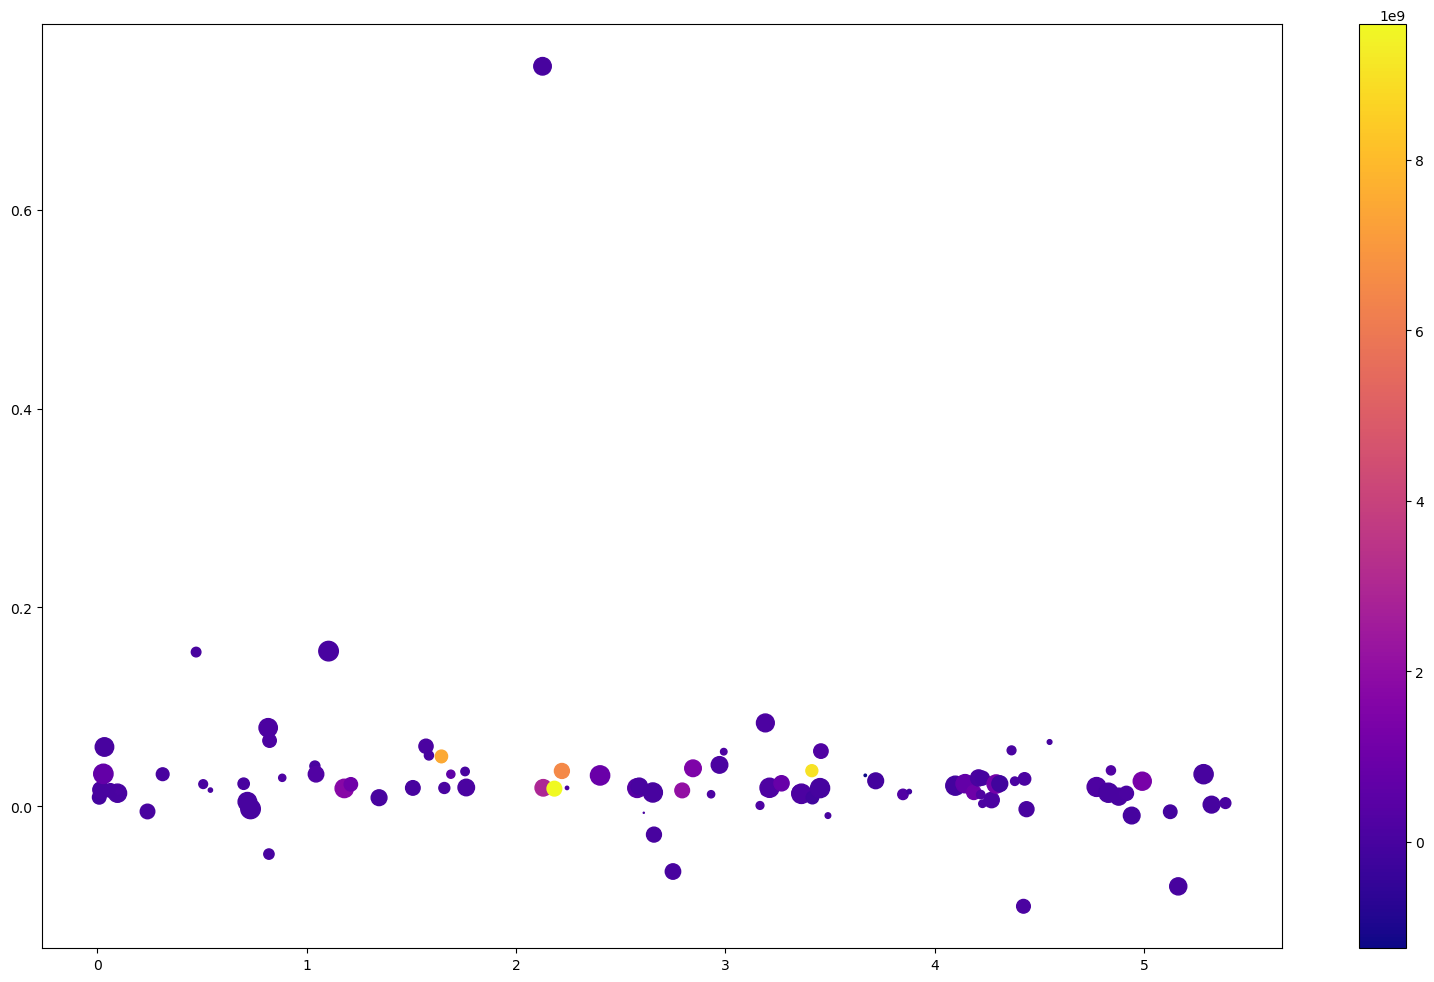

In [379]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 12))
scatter = plt.scatter(lowest_100_debt['Debt'], lowest_100_debt['EPS Yield'], c=lowest_100_debt['FCF'], cmap='plasma',s=200*size) 
plt.colorbar(scatter)
plt.show()

In [87]:
price1 = api.get_eod_historical_stock_market_data(symbol=financial_list[2]['General']['Code']+'.US',from_date='2024-03-28',to_date='2024-03-28')[0]['close']
print(price1)

11.87


In [66]:
ETprice = api.get_eod_historical_stock_market_data(symbol='ET.US',from_date='2024-03-28',to_date='2024-03-28')

In [70]:
print(ETprice[0]['close'])

15.73


In [34]:
import json
file_path = "Energy.csv"
Energydf.to_csv(file_path, index = False)

In [340]:
YPF_finan = api.get_fundamentals_data('YPF')

In [362]:
PR_finan = api.get_fundamentals_data('PR')
pr_price = get_price('PR')[0]['close']
pr_shre = get_shares(PR_finan)

In [357]:
print(YPF_finan['Highlights']['DividendYield'])
print(YPF_finan['Financials']['Cash_Flow']['quarterly']['2024-03-31']['dividendsPaid'])
print(YPF_finan['Financials']['Cash_Flow']['quarterly']['2023-12-31']['dividendsPaid'])
print(YPF_finan['Financials']['Cash_Flow']['quarterly']['2023-09-30']['dividendsPaid'])

None
None
0.00
0.00


In [349]:
print(PR_finan['Highlights']['DividendYield'])
print(PR_finan['Financials']['Cash_Flow']['quarterly']['2024-03-31']['dividendsPaid'])
print(PR_finan['Financials']['Cash_Flow']['quarterly']['2023-12-31']['dividendsPaid'])
print(PR_finan['Financials']['Cash_Flow']['quarterly']['2023-09-30']['dividendsPaid'])

0.0531
87194000.00
61154000.00
33174000.00


In [363]:
PR_dividend = get_dividend(PR_finan)
DVY_calculate = PR_dividend/pr_price/pr_shre
print(DVY_calculate)
print(PR_finan['Highlights']['DividendYield'])

0.007910427764405736
0.0531
